In [256]:
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy import stats

In [81]:
import IPython.display as ipd

In [84]:
import librosa, librosa.display

Pretty midi: contains utility function/classes for handling MIDI data, so that it’s in a format from which it is easy to modify and extract information.

Colin Raffel and Daniel P. W. Ellis. Intuitive Analysis, Creation and Manipulation of MIDI Data with pretty_midi. In 15th International Conference on Music Information Retrieval Late Breaking and Demo Papers, 2014.

https://colinraffel.com/publications/ismir2014intuitive.pdf

http://craffel.github.io/pretty-midi/

In [61]:
import pretty_midi

In [227]:
x, sr = librosa.load('cello-C-chord.wav')
ipd.Audio(x, rate=sr)

In [231]:
x

array([-5.6860480e-04, -8.8021689e-04, -5.0436287e-05, ...,
       -2.9052631e-05, -3.2959964e-05,  0.0000000e+00], dtype=float32)

Ejemplo de uso para analizar, manipular y sintetizar formato MIDI

In [64]:
Data_midi = pretty_midi.PrettyMIDI('/home/echeveste/Mis_trabajos/analisis_datos/maestro-v1.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi')

In [66]:
#Estima el tempo global 
print (Data_midi.estimate_tempo())
total_velocity = sum(sum(midi_data.get_chroma()))

197.84327821710903


## get_chroma:

Get the MIDI data as a sequence of chroma vectors.

#### Cromagram Definition:

The underlying observation is that humans perceive two musical pitches as similar in color if they differ by an octave.

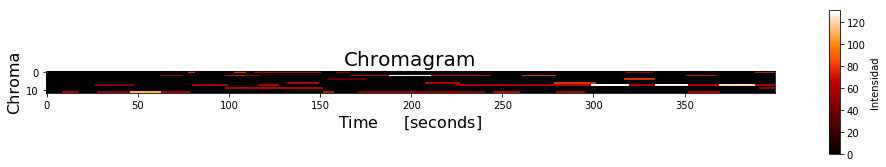

In [226]:
#Chromagram obtained from the audio recording.
plt.figure(figsize=(15,20))
plt.imshow(Data_midi.get_chroma(fs=100)[:,100:500],cmap=plt.cm.gist_heat)
plt.title('Chromagram',fontsize = 20)
plt.ylabel('Chroma',fontsize = 16)
plt.xlabel('Time $\quad$ [seconds]',fontsize = 16)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.45, 0.01, 0.1])
plt.colorbar(cax=cax,label='Intensidad')
plt.show()

In [245]:
#histo = Data_midi.synthesize()[90000:100000]
#plt.plot(np.linspace(0,12,len(histo)),histo)

In [263]:
import pretty_midi
# Create a PrettyMIDI object
cello_c_chord = pretty_midi.PrettyMIDI()

# Create an Instrument instance for a cello instrument
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)

# Iterate over note names, which will be converted to note number later
for note_name in ['C5']:#, 'E5', 'G5']:
    # Retrieve the MIDI note number for this note name
    note_number = pretty_midi.note_name_to_number(note_name)
    # Create a Note instance, starting at 0s and ending at .5s
    note = pretty_midi.Note(velocity=100, pitch=note_number, start=0, end=.5)
    # Add it to our cello instrument
    cello.notes.append(note)
# Add the cello instrument to the PrettyMIDI object
cello_c_chord.instruments.append(cello)
# Write out the MIDI data
cello_c_chord.write('cello-C-chord.mid')

In [264]:
 timidity -Ow cello-C-chord.mid 

SyntaxError: invalid syntax (<ipython-input-264-69d97b9fdaba>, line 1)